In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_data=pd.merge(clinical_trial_data,mouse_drug_data,on="Mouse ID",)

# Display the data table for preview
merge_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data=merge_data.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame
grouped_df=pd.DataFrame(grouped_data["Tumor Volume (mm3)"]).reset_index()

# Preview DataFrame
grouped_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_df_sem=merge_data.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
grouped_df_sem=pd.DataFrame(grouped_df_sem["Tumor Volume (mm3)"]).reset_index()

# Convert sem table to pivot
grouped_df_sem_pivot=grouped_df_sem.pivot(index='Timepoint', columns='Drug',values='Tumor Volume (mm3)')
# grouped_df_sem_pivot

# Preview DataFrame
grouped_df_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
grouped_pivot=grouped_df.pivot(index='Timepoint', columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
grouped_pivot.head()   

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


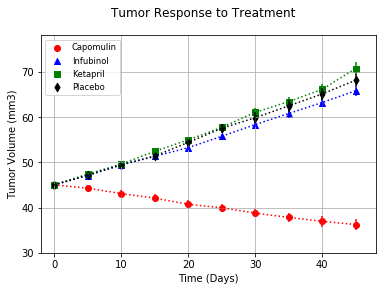

In [23]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

x_axis=[x*5 for x in range(10)]
ax.scatter(x_axis, grouped_pivot["Capomulin"], marker="o", facecolors="red")
ax.scatter(x_axis, grouped_pivot["Infubinol"], marker="^", facecolors="blue")
ax.scatter(x_axis, grouped_pivot["Ketapril"], marker="s", facecolors="green")
ax.scatter(x_axis, grouped_pivot["Placebo"], marker="d", facecolors="black")

ax.errorbar(x_axis,grouped_pivot["Capomulin"] , yerr=grouped_df_sem_pivot["Capomulin"], color="red",linestyle="dotted",label=None)
ax.errorbar(x_axis,grouped_pivot["Infubinol"] , yerr=grouped_df_sem_pivot["Infubinol"], color="blue",linestyle="dotted",label=None)
ax.errorbar(x_axis,grouped_pivot["Ketapril"] , yerr=grouped_df_sem_pivot["Ketapril"], color="green",linestyle="dotted",label=None)
ax.errorbar(x_axis,grouped_pivot["Placebo"] , yerr=grouped_df_sem_pivot["Placebo"], color="black",linestyle="dotted",label=None)

fig.suptitle("Tumor Response to Treatment")

ax.set_xlim(-2, 48)
ax.set_ylim(30, 78)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

ax.grid()
ax.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
fig.savefig("Tumor Response to Treatment.png")


In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint  and  Convert to DataFrame
Met_group=pd.DataFrame(grouped_data["Metastatic Sites"])

# Preview DataFrame
Met_group.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
grouped_met_sem=merge_data.groupby(["Drug","Timepoint"]).sem()


# Convert to DataFrame
Met_sem=pd.DataFrame(grouped_met_sem["Metastatic Sites"])

# Preview DataFrame
Met_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [21]:
# Minor Data Munging to Re-Format the Data Frames
Met_sem_pivot=Met_sem.reset_index().pivot(index='Timepoint', columns='Drug',values="Metastatic Sites")
Met_pivot=Met_group.reset_index().pivot(index='Timepoint', columns='Drug',values="Metastatic Sites")

# Preview that Reformatting worked
Met_pivot.head()
# Met_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


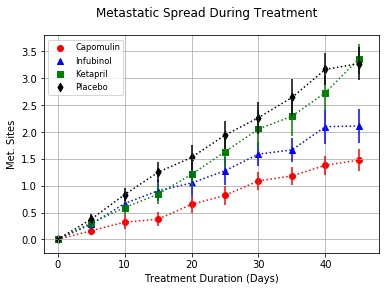

In [27]:
# Generate the Plot (with Error Bars)
fig, bx = plt.subplots()

x_axis=[x*5 for x in range(10)]
bx.scatter(x_axis, Met_pivot["Capomulin"], marker="o", facecolors="red")
bx.scatter(x_axis, Met_pivot["Infubinol"], marker="^", facecolors="blue")
bx.scatter(x_axis, Met_pivot["Ketapril"], marker="s", facecolors="green")
bx.scatter(x_axis, Met_pivot["Placebo"], marker="d", facecolors="black")

bx.errorbar(x_axis,Met_pivot["Capomulin"] , yerr=Met_sem_pivot["Capomulin"], color="red",linestyle="dotted",label=None)
bx.errorbar(x_axis,Met_pivot["Infubinol"] , yerr=Met_sem_pivot["Infubinol"], color="blue",linestyle="dotted",label=None)
bx.errorbar(x_axis,Met_pivot["Ketapril"] , yerr=Met_sem_pivot["Ketapril"], color="green",linestyle="dotted",label=None)
bx.errorbar(x_axis,Met_pivot["Placebo"] , yerr=Met_sem_pivot["Placebo"], color="black",linestyle="dotted",label=None)

fig.suptitle("Metastatic Spread During Treatment")

bx.set_xlim(-2, 48)
bx.set_ylim(-0.25, 3.8)

bx.set_xlabel("Treatment Duration (Days)")
bx.set_ylabel("Met. Sites")

bx.grid()
bx.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
fig.savefig("Metastatic Spread During Treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()